#### 무게를 찾기
 - 목표 : 농어 길이 피쳐를 사용해서 무게를 예측하기
 - 데이터셋 : fish.csv
 - 피쳐/속성 : lenghth
 - 타겟/라벨 : weight

[1] 데이터 준비 및 피쳐/타겟 분석

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fishDF = pd.read_csv(r'C:\Users\KDP-17\EX_PANDAS6\MachineLearning\data\fish.csv',usecols=[0,1,2])
fishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [4]:
mask = fishDF['Species'] == 'Perch'

In [5]:
# 피쳐와 타겟의 상관관계 분석
perchDF = fishDF[mask]
perchDF.corr(numeric_only=True)

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


[2] 피쳐와 타겟 분리

In [6]:
features = perchDF[['Length']]
target = perchDF['Weight']

In [7]:
print(f'features => {features.shape}, {features.ndim}')
print(f'target => {target.shape}, {target.ndim}')

features => (56, 1), 2
target => (56,), 1


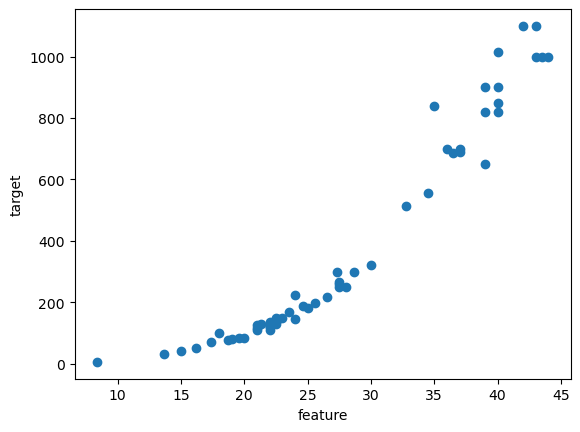

In [8]:
plt.scatter(features,target)
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

[3] 학습 준비
 - 학습 알고리즘 : KNN Regressor
 - 피쳐 스케일링

[3-2] 학습용 & 테스트용 데이터셋 분리
 - 전체 데이터셋 => 학습용:테스트용 75:25, 80:20, 70:30
 - 회귀 데이터셋 => 데이터셋 구성 요소에 대한 비율 고려 X 즉, stratify 미적용  
 ※ stratify는 분류에서만 적용, 회귀에서는 적용 X

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# sklearn 에서는 feature는 무조건 2차원 / target은 1차원
'''random_state는 모델이 최적화 되어 있지 않다면 사용 X
랜덤으로 뽑을때 특정 라인을 설정하고 그 라인에 해당하는 숫자만 뽑는 것, 테스트에서 사용
ex) random_state 없는 로또 번호는 1~45까지 무작위지만 random_state를 10으로 해놓으면 10~19의 숫자만 나옴
'''
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=10)

In [11]:
# train,test 비율 체크
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'X_test  : {X_test.shape}, {X_test.ndim}D')
print(f'y_test  : {y_test.shape}, {y_test.ndim}D')

X_train : (44, 1), 2D
y_train : (44,), 1D
X_test  : (12, 1), 2D
y_test  : (12,), 1D


In [12]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

[3-3] 피쳐 스케일링
- 사용하는 이유 : 무게의 범위와 길이의 범위가 달라서 맞춰주기 위해(특정 큰값으로 인한 편향을 줄이기 위해)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
# 스케일러 인스턴스 생성
mmscler = MinMaxScaler()

In [15]:
# 스케일러에 데이터셋 전용의 속성0.0값 적용(0재료 준비)
mmscler.fit(X_train)

MinMaxScaler()

In [16]:
mmscler.data_max_

array([44.])

In [17]:
# 학습용, 테스트용 데이터셋 스케일링 진행
x_train_scaled = mmscler.transform(X_train)
x_test_scaled = mmscler.transform(X_test)

[4] 학습 진행

In [18]:
from sklearn.neighbors import KNeighborsRegressor

# 학습 모델 인스턴스 생성
model = KNeighborsRegressor()

# 학습용 데이터셋으로 학습 진행
model.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [19]:
# 모델 파라미터 => 학습 후 즉, fit() 실행 후 설정되는 매개변수
model.n_features_in_,model.n_samples_fit_,model.effective_metric_params_

(1, 44, {})

[5] 최적의 K 찾기

In [28]:
scores={}
for k in range(1, model.n_samples_fit_+1):
    # 최근접 이웃의 갯수 설정 <== 모델 성능 좌우 : 하이퍼파라미터
    model.n_neighbors = k
    
    # 성능 평가
    score = model.score(x_test_scaled,y_test)

    scores[k]=score

In [21]:
list(scores.keys())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44]

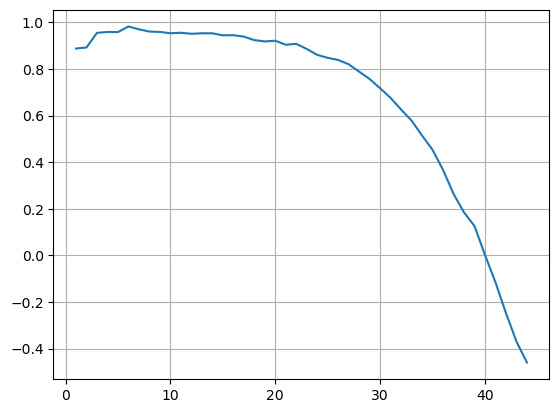

In [22]:
plt.plot(list(scores.keys()),list(scores.values()))
plt.grid()
plt.show()

In [23]:
# scores.values()의 최댓값 찾기 즉, 가장 좋은 값을 가진 것 찾기
#                                   x = (key,value) 그러니 x[1] 하면 value를 기준으로 내림차순 됨
best_k = sorted(scores.items(), key = lambda x: x[1], reverse=True)[0][0]
best_k

6

In [24]:
# 모델에 적용 => n_neighbors에 적용
model.n_neighbors=best_k

[6] 새로운 데이터의 무게 예측하기

In [25]:
new_length = input('농어의 길이 :')
print(f'new_length : {new_length}')

new_length : 


In [26]:
# 모델 적용을 위해 필요한 준비 : 데이터의 2D 형태, 스케일링 적용
## 데이터 2D 형태로 만들기(DataFrame)
dataDF = pd.DataFrame([[new_length]],columns=['Length'])
dataDF

,Length
0,


In [27]:
# 스케일링
data_scaled = mmscler.transform(dataDF)

ValueError: could not convert string to float: ''

In [ ]:
# 예측
model.predict(data_scaled)

array([1003.33333333])

In [ ]:
# 예측 결과 이유 확인
distance, index = model.kneighbors(data_scaled)
print(distance, index, sep='\n')

[[0.11235955 0.12640449 0.14044944 0.14044944 0.16853933 0.2247191 ]]
[[33 29  5 32 17  9]]


In [ ]:
y_train[index.reshape(-1)].sum()/model.n_neighbors

1003.3333333333334

In [ ]:
y_train

0      150.0
1      300.0
2       80.0
3       78.0
4      690.0
5     1100.0
6      650.0
7      110.0
8      556.0
9      820.0
10     110.0
11      70.0
12      32.0
13     125.0
14     850.0
15     150.0
16     260.0
17    1100.0
18     130.0
19     840.0
20     100.0
21     130.0
22     120.0
23     820.0
24     250.0
25     225.0
26     115.0
27     700.0
28     130.0
29    1000.0
30     685.0
31     700.0
32    1000.0
33    1000.0
34      85.0
35     900.0
36     218.0
37     145.0
38     197.0
39    1015.0
40       5.9
41     120.0
42     320.0
43      85.0
Name: Weight, dtype: float64

#### KNN Regressor 문제점/단점


In [ ]:
# 임의의 데이터
new_length = 8.4

# 2D DataFrame
dataDF = pd.DataFrame([[new_length]],columns=['Length'])

# 피쳐 스케일링
data_scaled = mmscler.transform(dataDF)

In [ ]:
# 예측
model.predict(data_scaled)

array([60.98333333])

=> 학습 데이터셋의 범위를 벗어난 더 큰 데이터, 더 작은 데이터의 경우  
정확한 예측 불가